<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Latent-Factor-Collaborative-Filtering" data-toc-modified-id="1.-Latent-Factor-Collaborative-Filtering-1">1. Latent Factor Collaborative Filtering<br></a></span><ul class="toc-item"><li><span><a href="#1.-SVD" data-toc-modified-id="1.-SVD-1.1">1. SVD</a></span></li></ul></li><li><span><a href="#2.-SGD" data-toc-modified-id="2.-SGD-2">2. SGD</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#예시" data-toc-modified-id="예시-2.0.1">예시</a></span></li></ul></li><li><span><a href="#2.1-SGD---장단점" data-toc-modified-id="2.1-SGD---장단점-2.1">2.1 SGD - 장단점</a></span></li><li><span><a href="#2.2-SGD---구현" data-toc-modified-id="2.2-SGD---구현-2.2">2.2 SGD - 구현</a></span></li></ul></li></ul></div>

# 1. Latent Factor Collaborative Filtering<br>
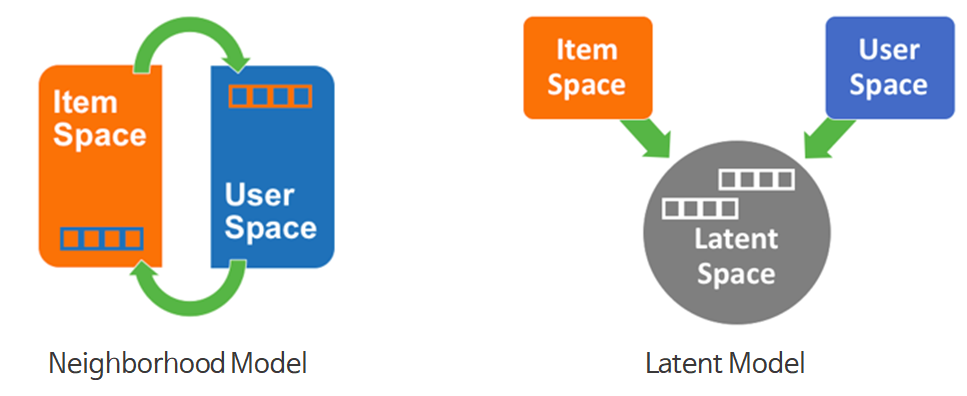<br>
- 정의<br>
**잠재 요인 협업 필터링**은 Rating Matrix에서 빈 공간을 채우기 위해서 사용자와 상품을 잘 표현하는 차원(Latent Factor)을 찾는 방법이다. 잘 알려진 행렬 분해는 추천 시스템에서 사용되는 협업 필터링 알고리즘의 한 종류이다. 행렬 분해 알고리즘은 사용자-아이템 상호 작용 행렬을 두 개의 저 차원 직사각형 행렬의 곱으로 분해하여 작동한다. 이 방법은 Netflix 챌린지에서 널리 알려지게 되었다.

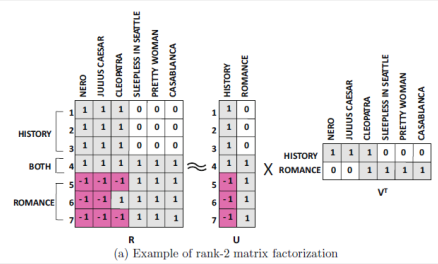

- 원리<br>
사용자의 잠재요인과 아이템의 잠재요인을 내적해서 평점 매트릭스를 계산하는 방식을 사용한다. 즉, 사용자의 잠재요인과 아이템의 잠재요인의 내적이 기존의 평점 매트릭스와 유사해지도록 만드는 잠재요인 값을 찾아야 한다. 하지만, 이런 잠재 요인 협업 필터링의 방법은 여러 가지가 있다. 대표적으로 넷플릭스 대회에서 사용한 SVD를 시작으로 최근 많이 사용하는 SGD, ALS가 있다.<br>
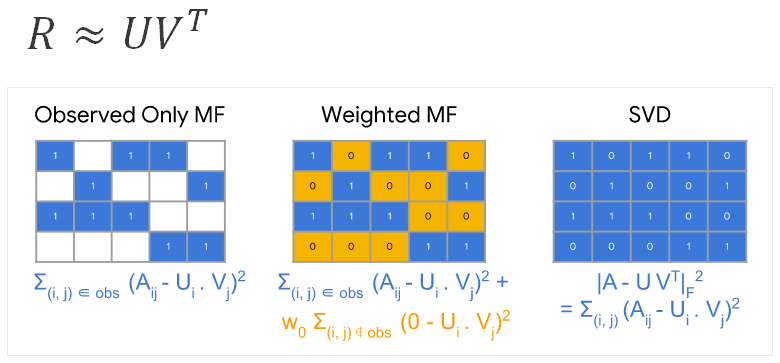

---

## 1. SVD
- 정의<br>
고유값 분해(eigen value Decomposition)와 같은 행렬을 대각화하는 방법
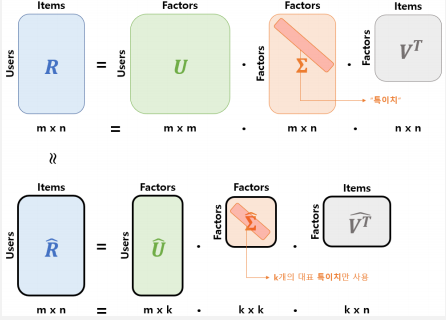

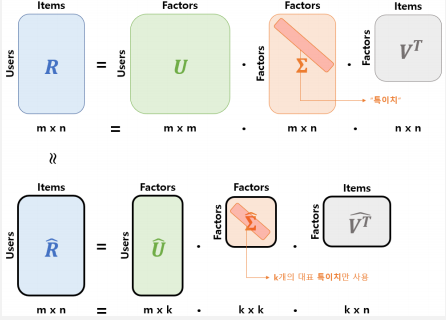

- 한계
    1. 데이터에 결측치가 없어야 함
    2. 대부분의 현업 데이터는 Sparse한 데이터

---

# 2. SGD

**SGD를 이용한 협업 필터링은 결측치와 상관없이 진행하는 장점이 있다.**
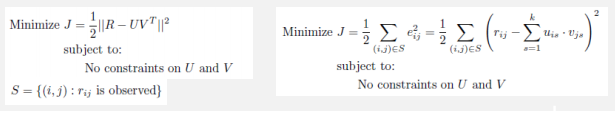<br>
기본적인 식은 위와 같다. 일단, 평점이 있는 부분에 대해서 Matrix Factorization을 시행하고 해당 부분의 오차를 최소화하는 것이다. 이 때, Gradient Descent처럼 오차를 최소화하는 방향을 찾기 위해 편미분이 수행된다.

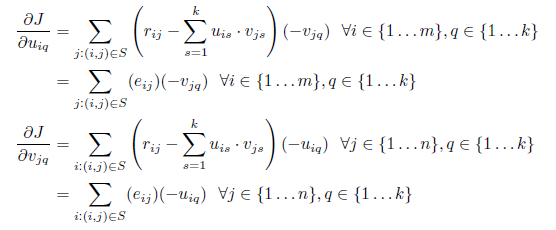

하지만, 딥러닝을 수행하다보면 보통 특정 Weight가 커지는 문제점이 생기고 이를 방지하기 위해서 Regularization을 수행한다. SGD에서도 마찬가지로 Regularization term을 두어서 Weight를 업데이트한다.

---

### 예시

Explict Feedback 된 형태의 4명의 유저에 대한 3개의 아이템에 대한 평점 Matrix<br>
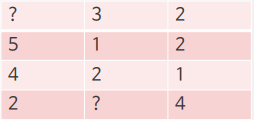

1. User Latent와 Item Latent의 임의로 초기화<br>
먼저, User Latent와 Item Latent를 임의로 초기화해주는 과정으로 시작한다. 이렇게 해서 구한 User Latent와 Item Latent의 곱을 통해 평점 행렬을 계산한다
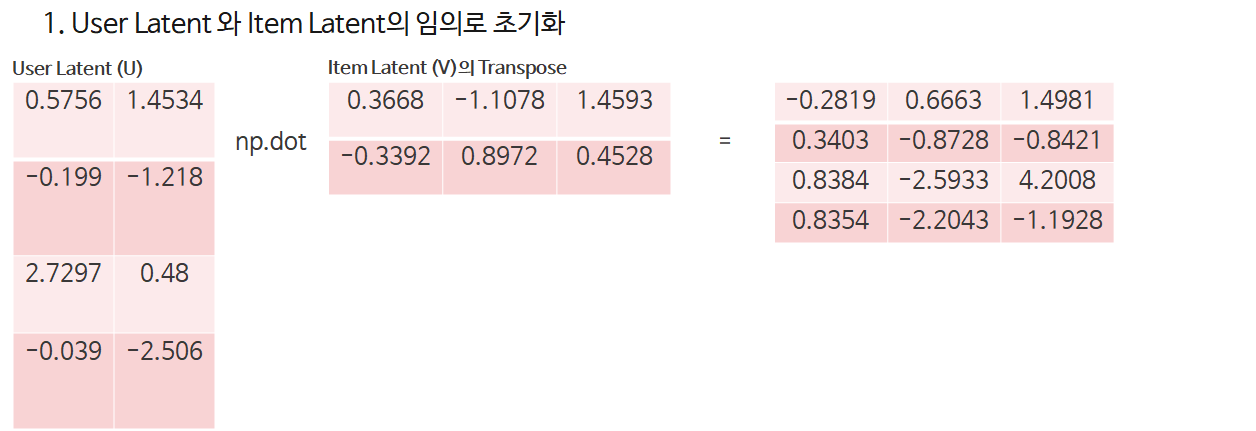<br>
먼저, 값이 존재하는 모든 평점에 대해서 순차적으로 Gradient Descent 과정을 진행한다. 아래는 평점 3인 부분에 대해서 오차를 계산하여 편미분을 계산한 것이다.

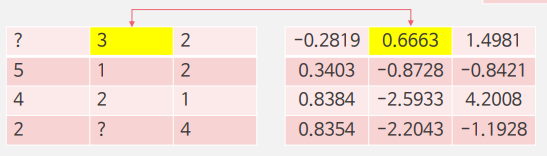

Error : $3 -0.6663 = 2.3337$<br> 
dUser = $-2.3337 * [-1/1078, 0.8972] + 0.01 * [0.5756. 1.4534]$  
Item = $-2.3337 * [0.5756. 1.4534] + 0.01 * [-1.1078, 0.8972]$

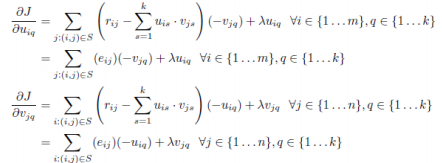

이렇게 계산한 Descent값을 통해서 User Latent와 Item Latent의 업데이트를 진행한다. 업데이트의 식은 아래와 같다.
- New Latent = Latent - learning rate * Descent<br><br>
참고로 업데이트되는 부분은 0번째 행, 1번째 열의 계산을 담당하는 User Latent의 0번째 행과 Item Latent의 1번째 열이다.

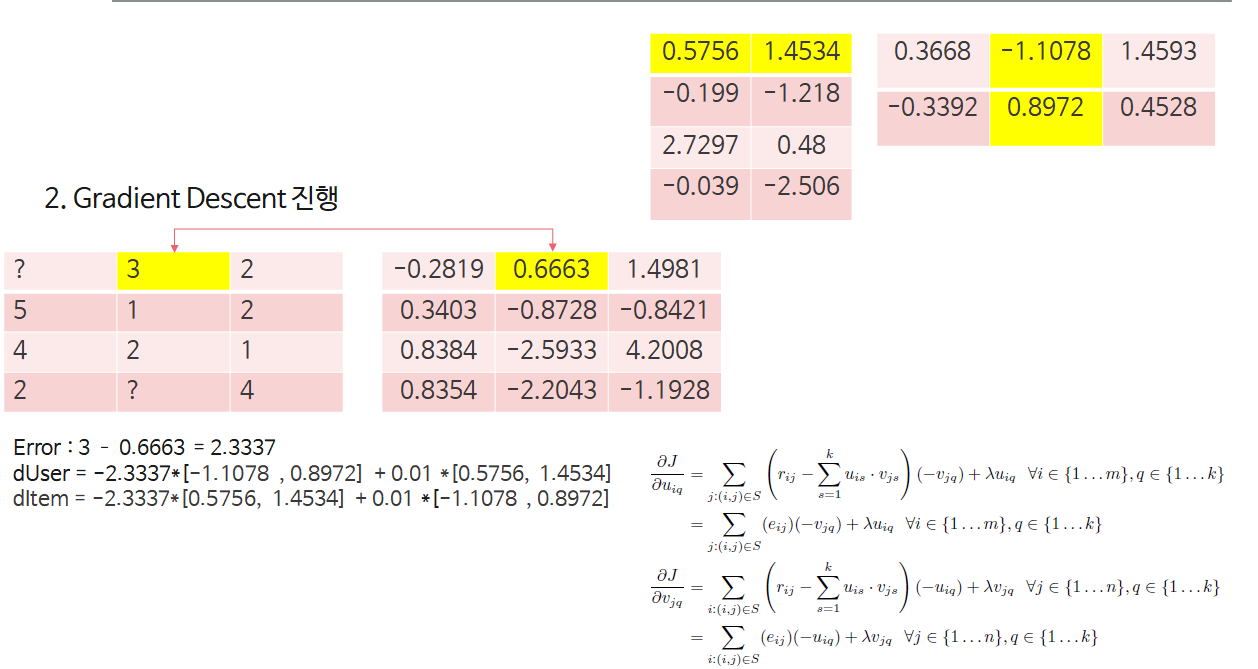

이제 위의 과정을 모든 평점에 대해서 반복해준다. 0번째 사용자의 2번째 아이템에 대해서 학습을 진행하므로 User Latent의 0번째와 Item Latent의 2번째가 반응하는 것을 볼 수 있다.

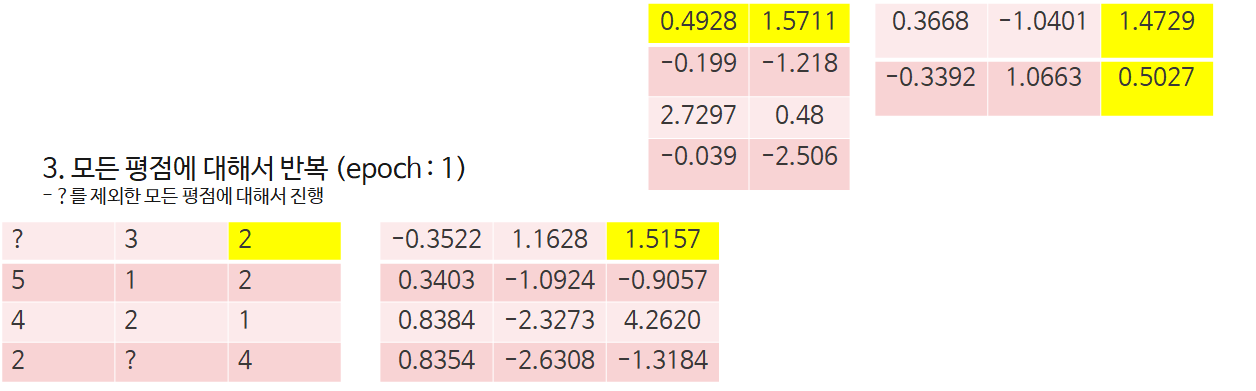

마찬가지로, 1번째 사용자의 0번째 아이템에 대해서 학습을 진행하므로 User Latent의 1번째와 Item Latent의 0번째가 반응하는 것을 볼 수 있다.

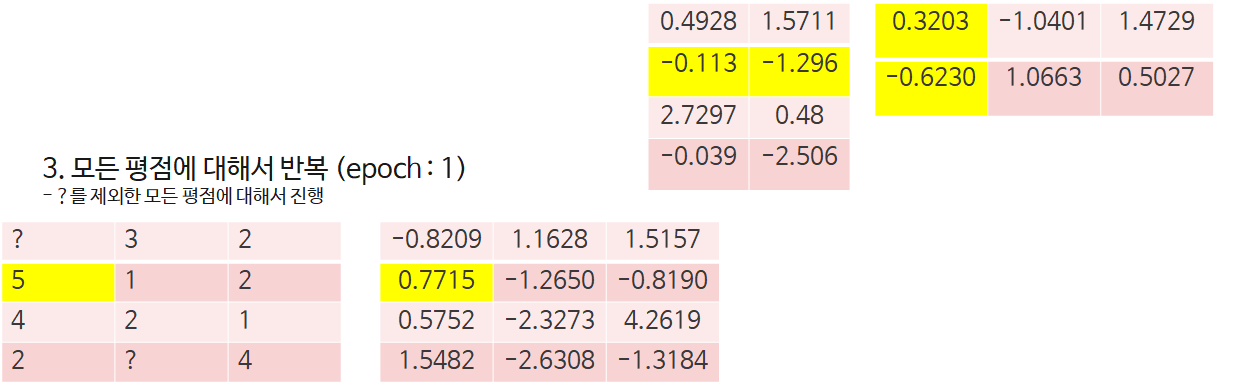

마지막으로, 3번째 사용자의 2번째 아이템에 대해서 학습을 진행하므로 User Latent의 3번째와 Item Latent의 2번째가 반응하고 1 epoch에 대해서 학습이 완료되게 된다.

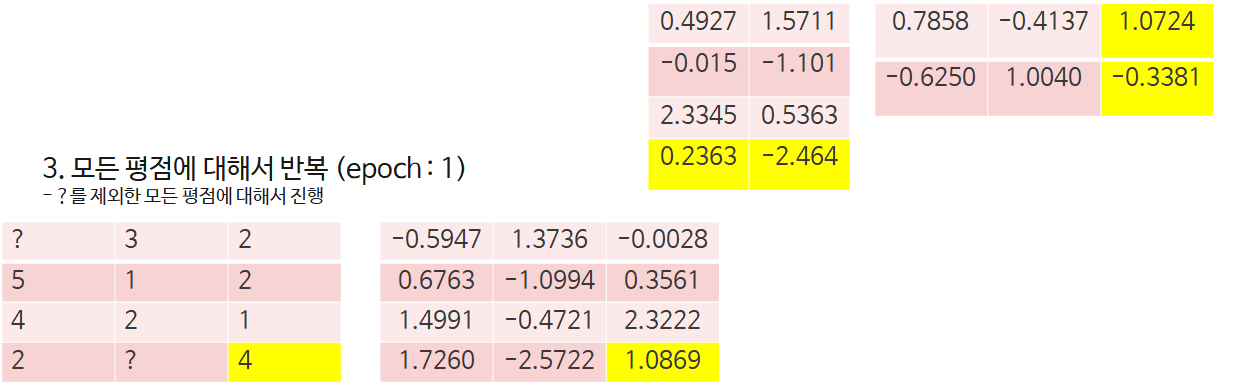

이 과정을 여러번 반복하게 되면 loss 값은 계속 떨어지게 되고 원 평점 행렬이 잘 생성된 것을 볼 수 있다.

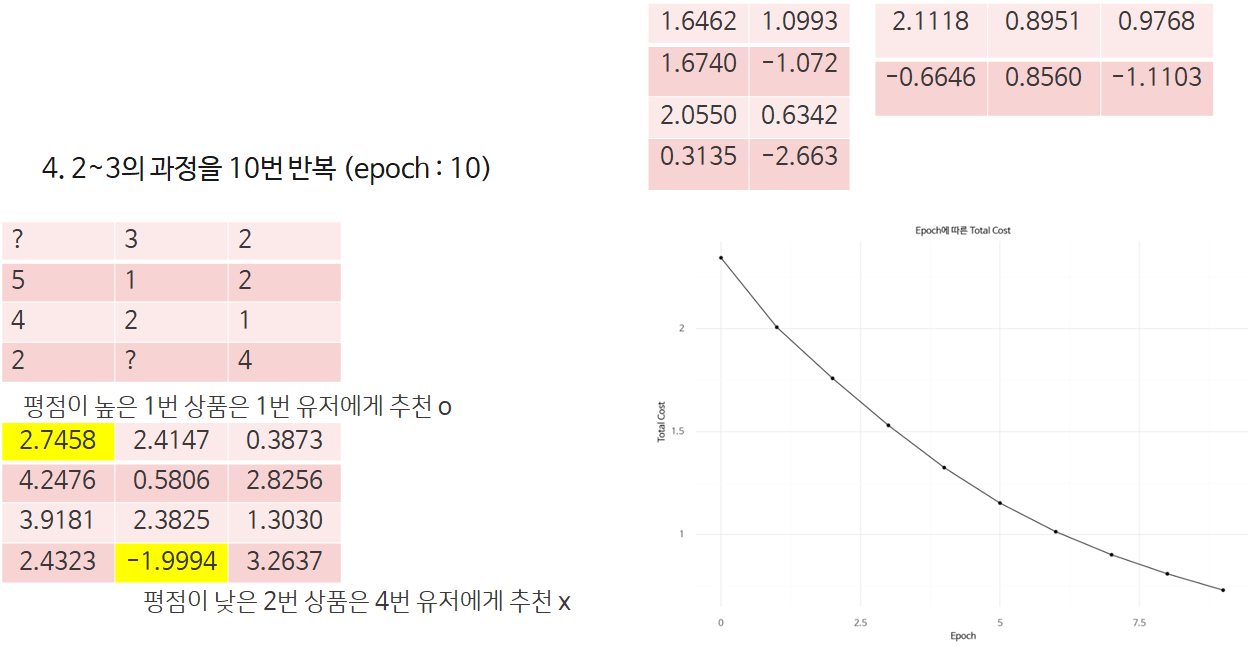

이제 생성된 평점 행렬로 아래와 같이 추천을 할 수 있다.
- 평점이 높은 1번 상품은 1번 유저에게 추천을 해준다.
- 평점이 낮은 2번 상품은 4번 유저에게 추천을 하지 않는다.

SGD 같은 경우는 GPU를 사용하고 결측치에 관계없이 사용할 수 있기에 현업에서도 많이 사용하는 방법이다.

---

## 2.1 SGD - 장단점
1. 장점
    - 매우 유연한 모델로 다른 Loss Function을 사용할 수 있으
    - parallelized가 가능함 (여러 GPU를 통해서 계산이 가능)
2. 단점 
    - 수렴까지 속도가 매우 느림 (여러 번 반복해서 계산해야 함)

---

## 2.2 SGD - 구현

In [1]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm_notebook as tqdm

import numpy as np

# Base code : https://yamalab.tistory.com/92
class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._P = np.random.normal(size=(self._num_users, self._k))
        self._Q = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_P = np.zeros(self._num_users)
        self._b_Q = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
            # rating이 존재하는 index를 기준으로 training
            xi, yi = self._R.nonzero()
            for i, j in zip(xi, yi):
                self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        # predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - self.get_prediction(x, y), 2)
        return np.sqrt(cost/len(xi))


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)



# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)
    R = np.array([
        [1, 0, 0, 1, 3],
        [2, 0, 3, 1, 1],
        [1, 2, 0, 5, 0],
        [1, 0, 0, 4, 4],
        [2, 1, 5, 4, 0],
        [5, 1, 5, 4, 0],
        [0, 0, 0, 1, 0],
    ])

    # P, Q is (7 X k), (k X 5) matrix

In [2]:
%%time
factorizer = MatrixFactorization(R, k=3, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
factorizer.fit()

Iteration: 10 ; cost = 1.1454
Iteration: 20 ; cost = 0.9017
Iteration: 30 ; cost = 0.7626
Iteration: 40 ; cost = 0.6683
Iteration: 50 ; cost = 0.5956
Iteration: 60 ; cost = 0.5317
Iteration: 70 ; cost = 0.4698
Iteration: 80 ; cost = 0.4073
Iteration: 90 ; cost = 0.3454
Iteration: 100 ; cost = 0.2867
Wall time: 124 ms


In [3]:
factorizer.get_complete_matrix()

array([[ 0.74150871,  1.29167642,  3.09143098,  1.24014084,  2.96985253],
       [ 1.61862429, -0.12128066,  3.14279982,  1.29248909,  1.22296212],
       [ 0.97859163,  1.86613356,  3.69510254,  5.00945803,  1.34182571],
       [ 1.8667857 ,  1.22891886,  0.90391283,  3.27511994,  3.85582555],
       [ 2.01232867,  1.21178928,  4.95954378,  3.95340686,  0.78334235],
       [ 4.95285412,  0.97715271,  4.97954294,  4.04098072,  2.32613601],
       [-1.78472733,  1.59796603,  0.34248494,  1.10986089,  3.68424402]])